#**Regression**#

#Linear regression

#Linear regression for single variable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [13]:
#STEP-1: Import Libraries
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#STEP-3: Get File from Drive using file-ID
downloaded = drive.CreateFile({'id':'19D98s0RYZ_W6JhPHEuH-aQbGc_pum-fq'}) # replace the id with id of file you want to access
downloaded.GetContentFile('house.xlsx')

In [14]:
df = pd.read_excel("house.xlsx")
df = pd.DataFrame(df)
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


Text(0.5, 1.0, 'Simple linear regression')

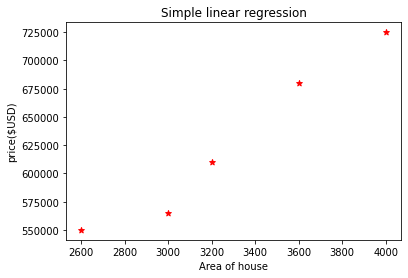

In [15]:
plt.scatter(df.area,df.price,color = "red",marker="*")
plt.xlabel("Area of house")
plt.ylabel("price($USD)")
plt.title("Simple linear regression")

#**We need to find the best fitting line here in this figure above. First, We will take manual approach and then we will use Scikit-learn's application**

---
**Manual approach**


---




In [28]:
x = df['area'].values
y = df['price'].values

In [29]:
mean_x = np.mean(x) #Mean of the prediction column
mean_y = np.mean(y) #Mean of the target column

Training the dataset

In [30]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df[['price']]) #Setting up the column name of X & Y. This is where we train the model with our dataset's values

LinearRegression()

fit-intercpt = True [This means that the model is successfully trained and now is ready to predict]

First, We manually calculate the house price and then generate the predicte output and compare the 2 results to measure the predicition accuracy or the success rate.

In [32]:
reg.predict([[3330]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[632789.38356164]])

The answer is near to the original answer. If the training dataset is large enough, We can get a more accurate predicted output.

The equation that was used here is `y = Mx + C`. Here, `(M,C) = (Slope,Intercept)`


#Linear regression for multiple variables

#**Pickle and Joblib the object**#

#Joblib:
Joblib is a set of tools to provide lightweight pipelining in Python. In particular, joblib offers: transparent disk-caching of the output values and lazy re-evaluation (memoize pattern) easy simple parallel computing. 

#Pickle:
Python pickle module is used for serializing and de-serializing a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serializes” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.

In [37]:
import pickle

In [49]:
with open('model_pickle','wb') as f: #Opening the pickle in write mode
  pickle.dump(reg,f)                 #Dumping an object to use it later

In [50]:
with open('model_pickle','rb') as f: #Opening the pickle in read mode
  mp = pickle.load(f)                #Loading the previously dumped object from inside it and assigning the object to a varible "mp"

Using the same model again

In [52]:
mp.predict([[3000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[587979.45205479]])

Another example

In [70]:
with open('model_pickle','wb') as f: #Opening the pickle in write mode
  pickle.dump(reg,f)                 #Dumping an object to use it later

In [69]:
with open('model_pickle','rb') as f: #Opening the pickle in read mode
  mp = pickle.load(f)                #Loading the previously dumped object from inside it and assigning the object to a varible "mp"

In [55]:
mp.predict([[15000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[2217431.50684932]])

In [58]:
reg.coef_ #It prints the co-efficient "M" of the equation "y = Mx + C"

array([[135.78767123]])

In [59]:
reg.intercept_ #It prints the intercept "C" of the equation "y = Mx + C"

array([180616.43835616])

Checking the accuracy of the predicted value by manual calculation

In [71]:
m = 135.78767123
c = 180616.43835616
x = 3300
y = (m*x)+c
print("For x = 3300, y =",y)

x = 15000
y = (m*x)+c
print("For x = 15000, y =",y)

For x = 3300, y = 628715.75341516
For x = 15000, y = 2217431.50680616
